In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

%matplotlib inline
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [21]:
tf.__version__

'2.2.0'

In [22]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

perceptron_clf = Perceptron()
perceptron_clf.fit(X, y)

y_pred = perceptron_clf.predict([[2., 0.5]]); y_pred

array([0])

## Neural Network for MNIST Dataset

In [23]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
X_test = X_test / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [25]:
X_train.shape

(55000, 28, 28)

<ipython-input-26-428e82df319c>:1: DeprecationWarning: This function is deprecated. Please call randint(0, 55000 + 1) instead
  plt.imshow(X_train[np.random.random_integers(0, X_train.shape[0])], cmap='gray')


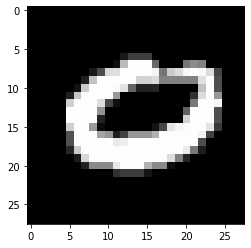

In [26]:
plt.imshow(X_train[np.random.random_integers(0, X_train.shape[0])], cmap='gray')

In [27]:
# Functional calls
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

NameError: name 'X_train' is not defined

### Initial Evaluation

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

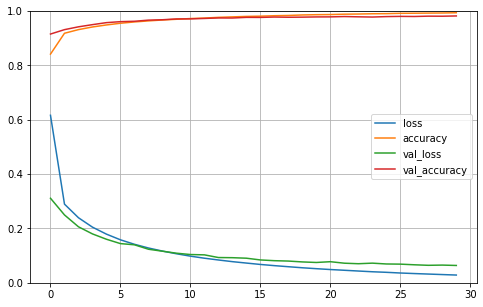

In [102]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [98]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


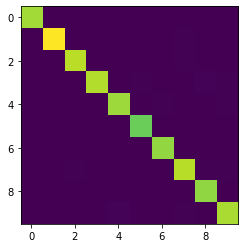

In [104]:
plt.imshow(confusion_matrix(y_pred, y_test))

### Subclassing API for Same Model

In [29]:
class MNISTModel(keras.Model):
    def __init__(self, units1=300, units2=100, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.input_process = keras.layers.Flatten(input_shape=[28, 28])
        self.hidden1 = keras.layers.Dense(units1, activation=activation)
        self.hidden2 = keras.layers.Dense(units2, activation=activation)
        self.main_output = keras.layers.Dense(10, activation="softmax")
    
    def call(self, inputs):
        inputs = self.input_process(inputs)
        hidden1 = self.hidden1(inputs)
        hidden2 = self.hidden2(hidden1)
        main_output = self.main_output(hidden2)
        return main_output

In [30]:
model = MNISTModel()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6026 - accuracy: 0.8457 - val_loss: 0.3170 - val_accuracy: 0.9136
Epoch 2/30
 940/1719 [===============>..............] - ETA: 1s - loss: 0.3045 - accuracy: 0.9139

KeyboardInterrupt: 

### TensorBoard

In [32]:
import os
from pathlib import Path
root_logdir = os.path.join(os.curdir, "logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [37]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid),
                callbacks=[tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2184 - accuracy: 0.9381 - val_loss: 0.1961 - val_accuracy: 0.9458
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1897 - accuracy: 0.9463 - val_loss: 0.1710 - val_accuracy: 0.9524
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1674 - accuracy: 0.9524 - val_loss: 0.1529 - val_accuracy: 0.9570
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1499 - accuracy: 0.9578 - val_loss: 0.1390 - val_accuracy: 0.9616
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1351 - accuracy: 0.9616 - val_loss: 0.1344 - val_accuracy: 0.9630
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1227 - accuracy: 0.9649 - val_loss: 0.1234 - val_accuracy: 0.9672
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1120 - accuracy: 0.9683 - val_loss: 0.1142 - val_accuracy:

In [36]:
import os

logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%load_ext tensorboard
%tensorboard --logdir {logs_base_dir} --host 0.0.0.0

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [20]:
!which python

/opt/tljh/user/bin/python


In [6]:
!kill 2148